In [76]:
# Import all libraries

import pandas as pd
import numpy as np
from math import cos, sin, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit
from numpy import arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

In [77]:
# Initialize data

electionSheet = '1OjAm_N93Xdyf7_z92zbN6o3xDXg-igPcJJjIIvV-1-8'
electionData = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{electionSheet}/export?format=csv")

specialStates = '10sMhiT4WsBhnlgZgiioB6Fpk1YkQk-ehw6rbW-kuJaA'
specialData = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{specialStates}/export?format=csv")

My margins are

Winner wins by 0-1.0 TILT
Winner wins by 1.0-5.0 LEAN
Winner wins by 5.0 to 15.0 LIKELY
Winner wins by 15.0+ SAFE

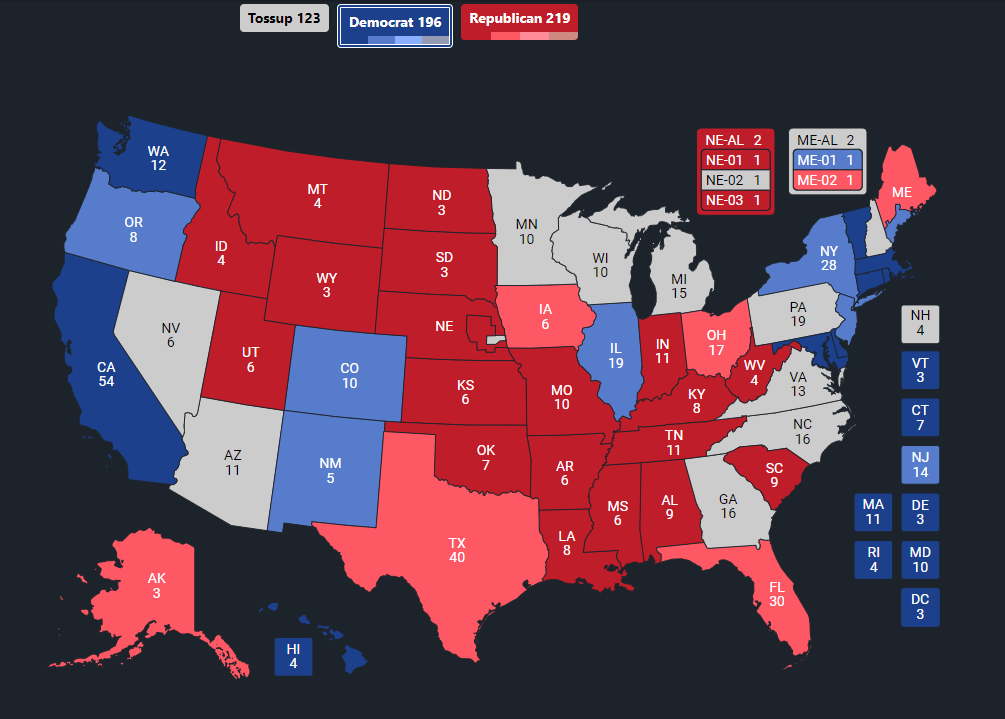

In [78]:
# Return data

electionData

,National environment,Year,Michigan,Wisconsin,Pennsylvania,Minnesota,Georgia,North Carolina,Arizona,Nevada,New Hampshire,Maine,New York,New Jersey,Virginia,Nebraskas 2nd
0,R+1.1,2024,-0.4,-0.2,1.2,-3.3,4.2,5.5,3.5,4.2,-4.1,2.1,-12.7,-8.1,-2.6,0.2
1,D+4.4,2020,1.6,3.8,3.2,-2.7,4.6,5.7,4.1,2.0,-3.0,-4.6,-18.7,-11.4,-5.7,-2.2
2,D+1.9,2016,2.1,2.7,2.6,0.4,7.0,5.6,5.4,-0.5,-1.5,-1.0,-20.7,-12.2,-3.4,4.1
3,D+3.9,2012,-5.6,-3.0,-1.5,-3.8,11.7,5.9,13.0,-2.8,-1.7,-11.1,-24.5,-13.8,0.0,11.0
4,D+7.2,2008,-9.3,-6.7,-3.1,-3.0,12.4,7.5,15.7,-5.3,-2.4,-10.1,-19.5,-9.1,0.9,5.9


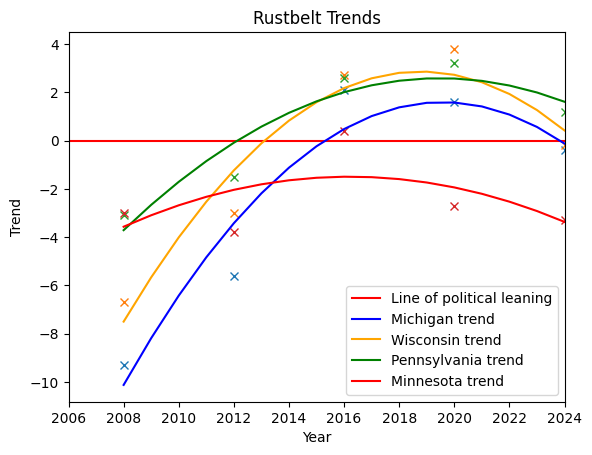

In [79]:
# Plot data

x = electionData['Year']
y1 = electionData['Michigan']
y2 = electionData['Wisconsin']
y3 = electionData['Pennsylvania']
y4 = electionData['Minnesota']

plt.plot(x, y1, 'x')
plt.plot(x, y2, 'x')
plt.plot(x, y3, 'x')
plt.plot(x, y4, 'x')
plt.xlabel('Year')
plt.ylabel('Trend')

plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Line of political leaning')
plt.xlim(2006, 2024)

plt.xlabel('Year')
plt.ylabel('Trend')
plt.title("Rustbelt Trends")


# Fit a curve to the data

def map_func(x, a, b, c):
  comp = a * x + b * x ** 2 + c
  return comp

# Fitting Michigan
opt_param, _ = curve_fit(map_func, x, y1)
a, b, c = opt_param

x_line = arange(2008, 2025)
y_line = map_func(x_line, a, b, c)

plt.plot(x_line, y_line, color = 'blue', label = 'Michigan trend')


# Fitting Wisconsin
opt_param, _ = curve_fit(map_func, x, y2)
a, b, c = opt_param

x_line2 = arange(2008, 2025)
y_line2 = map_func(x_line2, a, b, c)

plt.plot(x_line2, y_line2, color = 'orange', label = 'Wisconsin trend')


# Fitting Pennsylvania
opt_param, _ = curve_fit(map_func, x, y3)
a, b, c = opt_param

x_line3 = arange(2008, 2025)
y_line3 = map_func(x_line3, a, b, c)

plt.plot(x_line3, y_line3, color = 'green', label = 'Pennsylvania trend')

# Fitting Minnesota
opt_param, _ = curve_fit(map_func, x, y4)
a, b, c = opt_param

x_line4 = arange(2008, 2025)
y_line4 = map_func(x_line4, a, b, c)

plt.plot(x_line4, y_line4, color = 'red', label = 'Minnesota trend')

# Display trend
plt.legend()
plt.show()


The current environment, as of June 7 2024, is R+1.1. Michigan looks to be voting exactly to the center of the national environment, while Wisconsin looks to be voting about about 0.7 percent to the right of the national environment. Pennsylvania looks to be voting around 1.7% to the right of the national environment. Minnesota looks to be trending left as the twin cities trend left. They look to be voting around 3.3% to the left of the nation.

Therefore

MI: R+1.1 or LEAN Republican
WI: R+1.8 or LEAN Republican
PA: R+2.8 or LEAN Republican
MN: D+2.2 or LEAN Democratic

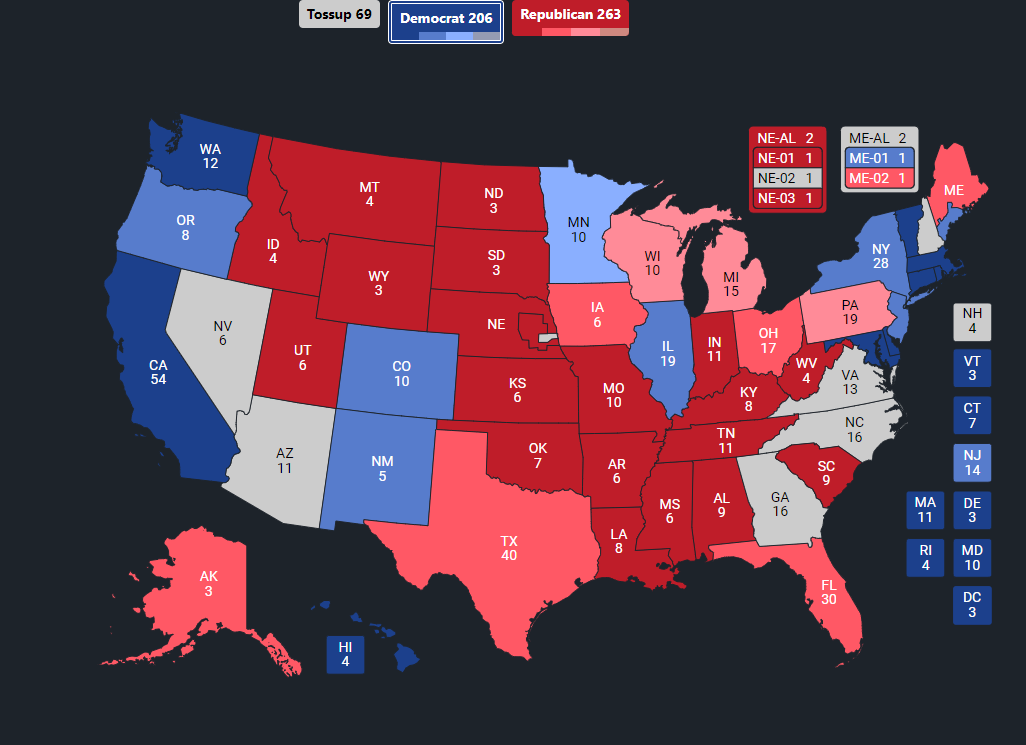

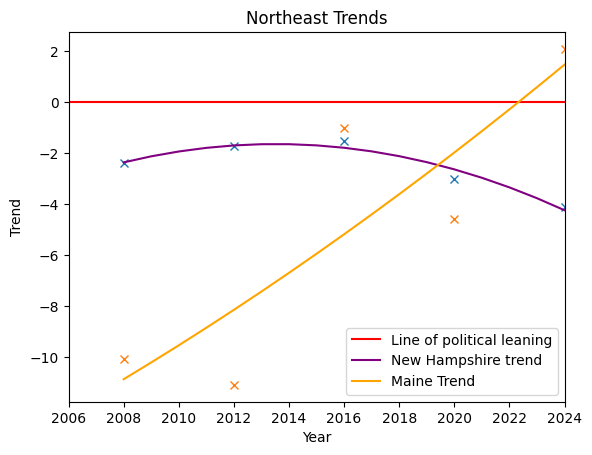

In [80]:
# Plot New Hampshire and Maine

y5 = electionData['New Hampshire']
y6 = electionData['Maine']
plt.plot(x, y5, 'x')
plt.plot(x, y6, 'x')
plt.xlabel('Year')
plt.ylabel('Trend')

plt.xlabel('Year')
plt.ylabel('Trend')
plt.title("Northeast Trends")

plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Line of political leaning')
plt.xlim(2006, 2024)

# Fit a curve to the data

def map_func(x, a, b, c):
  comp = a * x + b * x ** 2 + c
  return comp

# Fitting New Hampshire
opt_param, _ = curve_fit(map_func, x, y5)
a, b, c = opt_param

x_line5 = arange(2008, 2025)
y_line5 = map_func(x_line5, a, b, c)

plt.plot(x_line5, y_line5, color = 'purple', label = 'New Hampshire trend')

# Fitting Maine
opt_param, _ = curve_fit(map_func, x, y6)
a, b, c = opt_param

x_line6 = arange(2008, 2025)
y_line6 = map_func(x_line6, a, b, c)

plt.plot(x_line6, y_line6, color = 'orange', label = 'Maine Trend')

# Display trend
plt.legend()
plt.show()


With an R+1.1 environment. New Hampshire looks to vote around 3.5% to the left of Median. Maine looks to be careening to the right, with Trump leading in early polls, looking to vote around 1.6% to the right of the nation.

ME: R+2.7 or LEAN republican
NH: D+2.4 or LEAN democrat

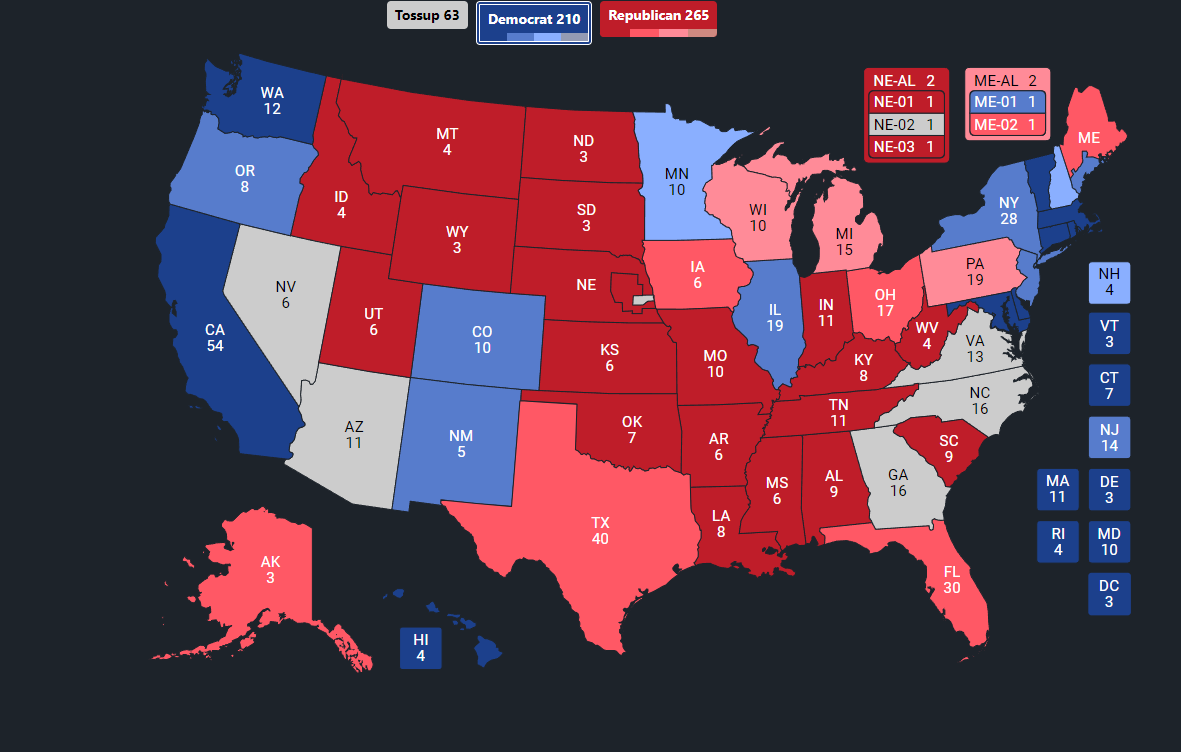

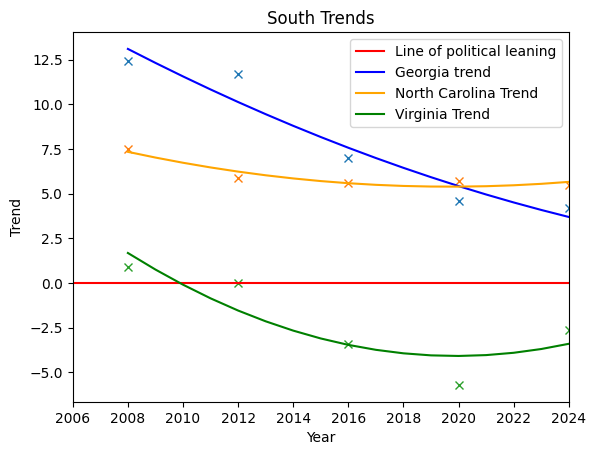

In [81]:
# Plot South

y7 = electionData['Georgia']
y8 = electionData['North Carolina']
y9 = electionData['Virginia']
plt.plot(x, y7, 'x')
plt.plot(x, y8, 'x')
plt.plot(x, y9, 'x')
plt.xlabel('Year')
plt.ylabel('Trend')

plt.xlabel('Year')
plt.ylabel('Trend')
plt.title("South Trends")

plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Line of political leaning')
plt.xlim(2006, 2024)

# Fit a curve to the data

def map_func(x, a, b, c):
  comp = a * x + b * x ** 2 + c
  return comp

# Fitting Georgia
opt_param, _ = curve_fit(map_func, x, y7)
a, b, c = opt_param

x_line7 = arange(2008, 2025)
y_line7 = map_func(x_line7, a, b, c)

plt.plot(x_line5, y_line7, color = 'blue', label = 'Georgia trend')

# Fitting North Carolina
opt_param, _ = curve_fit(map_func, x, y8)
a, b, c = opt_param

x_line8 = arange(2008, 2025)
y_line8 = map_func(x_line8, a, b, c)

plt.plot(x_line6, y_line8, color = 'orange', label = 'North Carolina Trend')

# Fitting Virginia
opt_param, _ = curve_fit(map_func, x, y9)
a, b, c = opt_param

x_line9 = arange(2008, 2025)
y_line9 = map_func(x_line9, a, b, c)

plt.plot(x_line6, y_line9, color = 'green', label = 'Virginia Trend')

# Display trend
plt.legend()
plt.show()


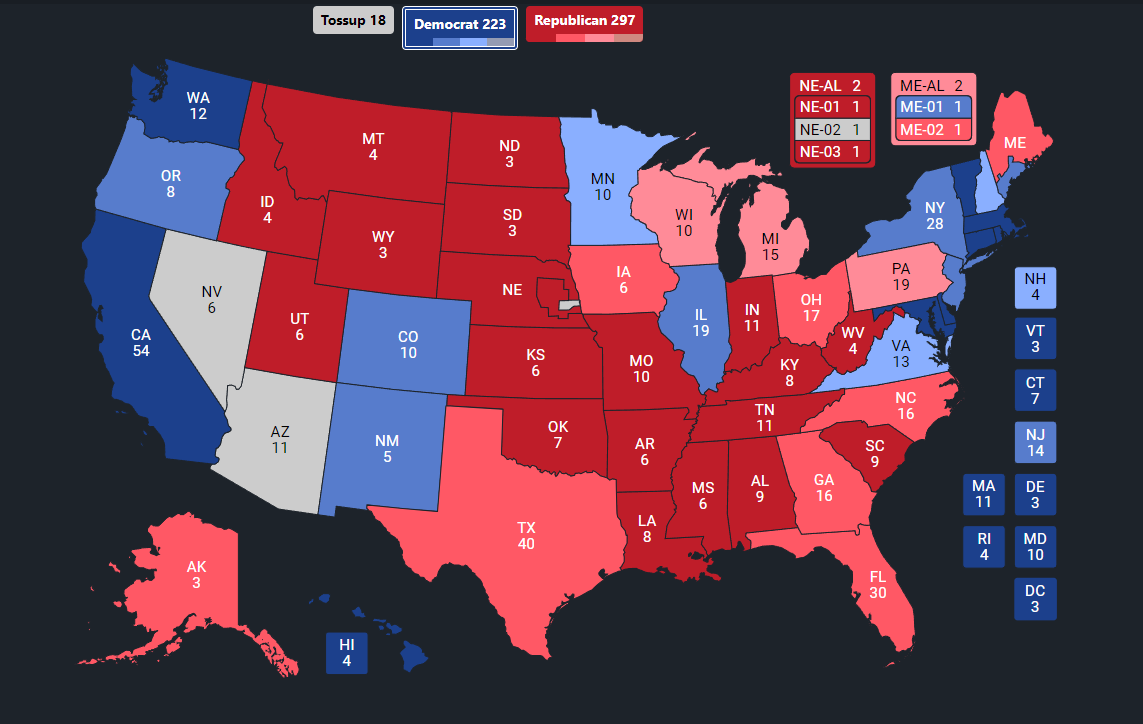North Carolina looks to be voting around 5.8 percent to the right of the national environment, while Georgia looks like it will vote around 3.9 percent to the right. Virginia looks like it will vote around 2.7% to the left of the nation.

NC: R+6.9 or LIKELY republican
GA: R+5.0 or LIKELY republican
VA: D+3.8 or LEAN republican

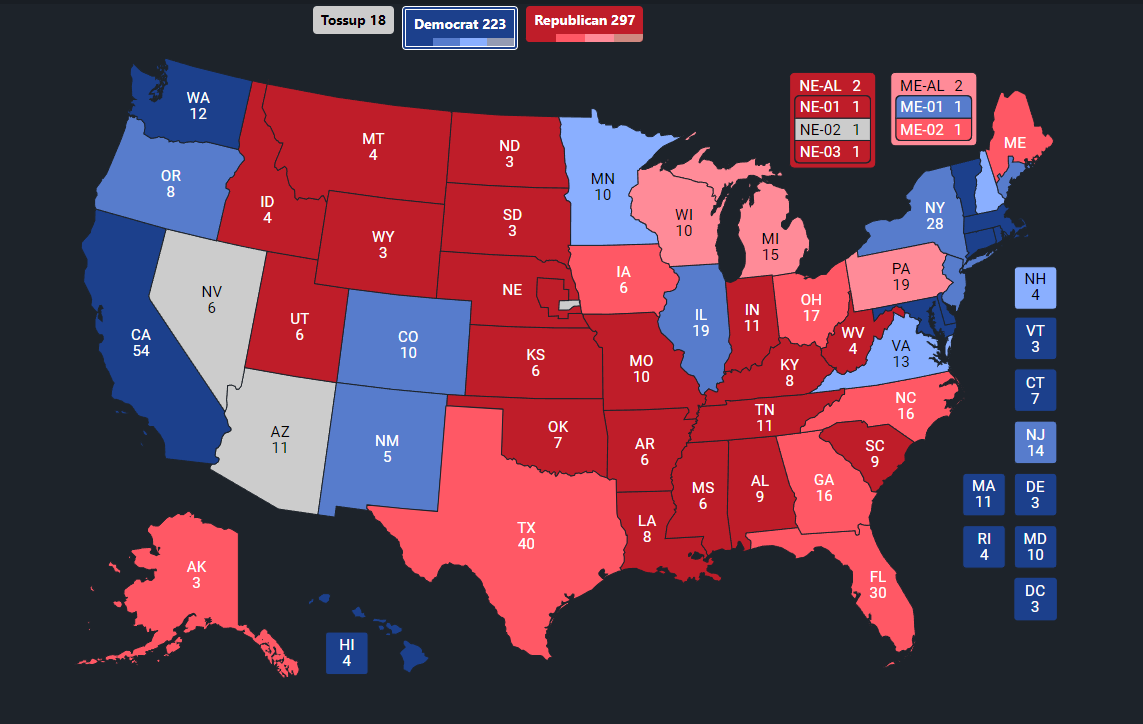

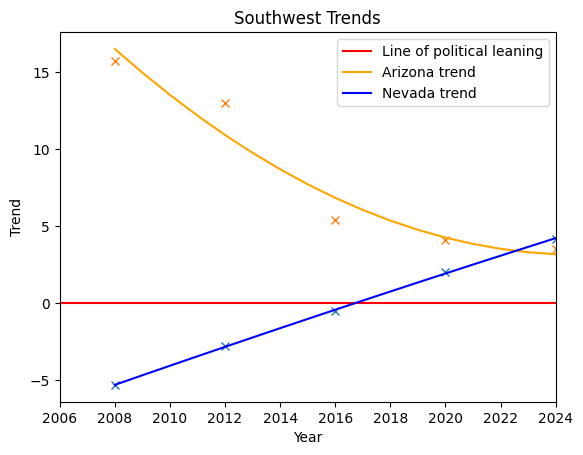

In [86]:
# Plot Southwest

y10 = electionData['Nevada']
y11 = electionData['Arizona']
plt.plot(x, y10, 'x')
plt.plot(x, y11, 'x')
plt.xlabel('Year')
plt.ylabel('Trend')

plt.xlabel('Year')
plt.ylabel('Trend')
plt.title("Southwest Trends")

plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Line of political leaning')
plt.xlim(2006, 2024)

# Fit a curve to the data

def map_func(x, a, b, c):
  comp = a * x + b * x ** 2 + c
  return comp

# Fitting Arizona
opt_param, _ = curve_fit(map_func, x, y11)
a, b, c = opt_param

x_line11 = arange(2008, 2025)
y_line11 = map_func(x_line11, a, b, c)

plt.plot(x_line11, y_line11, color = 'orange', label = 'Arizona trend')

# Fitting Nevada
opt_param, _ = curve_fit(map_func, x, y10)
a, b, c = opt_param

x_line10 = arange(2008, 2025)
y_line10 = map_func(x_line11, a, b, c)

plt.plot(x_line10, y_line10, color = 'blue', label = 'Nevada trend')


# Display trend
plt.legend()
plt.show()


Arizona looks to be voting around 3.4% to the right of the nation, while Nevada looks to be voting around 4.2% to the right of the nation.

AZ: R+4.5 Lean Republican
NV: R+5.6 Likely Republican

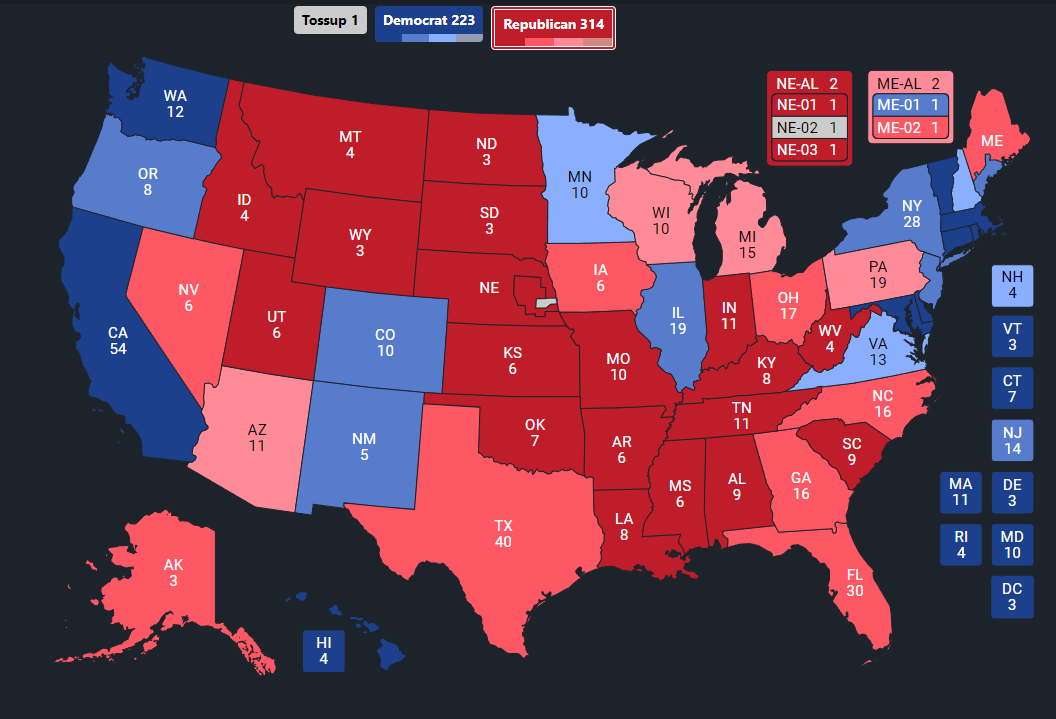

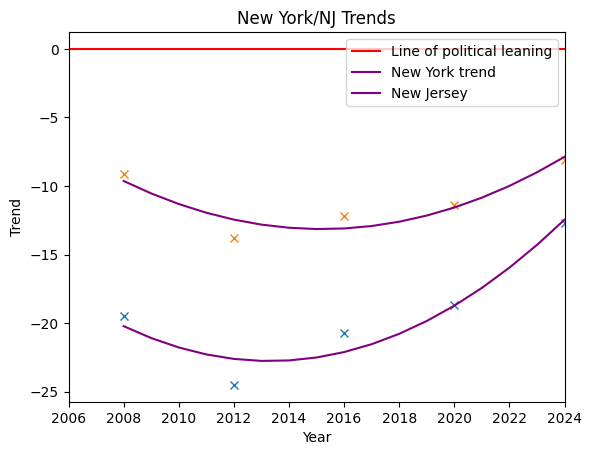

In [83]:
# Plot New York and New Jersey

y12 = electionData['New York']
y13 = electionData['New Jersey']
plt.plot(x, y12, 'x')
plt.plot(x, y13, 'x')
plt.xlabel('Year')
plt.ylabel('Trend')

plt.xlabel('Year')
plt.ylabel('Trend')
plt.title("New York/NJ Trends")

plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Line of political leaning')
plt.xlim(2006, 2024)

# Fit a curve to the data

def map_func(x, a, b, c):
  comp = a * x + b * x ** 2 + c
  return comp

# Fitting Arizona
opt_param, _ = curve_fit(map_func, x, y12)
a, b, c = opt_param

x_line12 = arange(2008, 2025)
y_line12 = map_func(x_line12, a, b, c)

plt.plot(x_line12, y_line12, color = 'purple', label = 'New York trend')

# Fitting Nevada
opt_param, _ = curve_fit(map_func, x, y13)
a, b, c = opt_param

x_line13 = arange(2008, 2025)
y_line13 = map_func(x_line13, a, b, c)

plt.plot(x_line13, y_line13, color = 'purple', label = 'New Jersey')


# Display trend
plt.legend()
plt.show()

New York looks to vote around 12.7 percent to the left of median, and New Jersey about 8.1 to the left.

NY: R+13.8 LIKELY democrat
NJ: R+9.2 LIKELY democrat

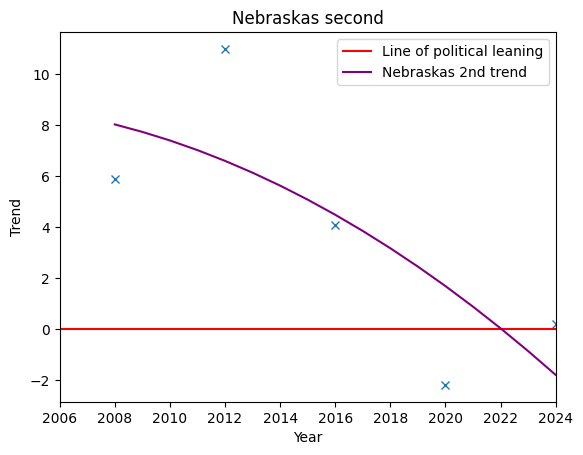

In [87]:
# Plot New York and New Jersey

y14 = electionData['Nebraskas 2nd']
plt.plot(x, y14, 'x')
plt.xlabel('Year')
plt.ylabel('Trend')

plt.xlabel('Year')
plt.ylabel('Trend')
plt.title("Nebraskas second")

plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Line of political leaning')
plt.xlim(2006, 2024)

# Fit a curve to the data

def map_func(x, a, b, c):
  comp = a * x + b * x ** 2 + c
  return comp

# Fitting Nebraskas second
opt_param, _ = curve_fit(map_func, x, y14)
a, b, c = opt_param

x_line14 = arange(2008, 2025)
y_line14 = map_func(x_line14, a, b, c)

plt.plot(x_line14, y_line14, color = 'purple', label = 'Nebraskas 2nd trend')


# Display trend
plt.legend()
plt.show()

Nebraskas second district looks to vote around 1.7% to the left of the national environment. This means

NE-02: D+0.6 TILT democrat

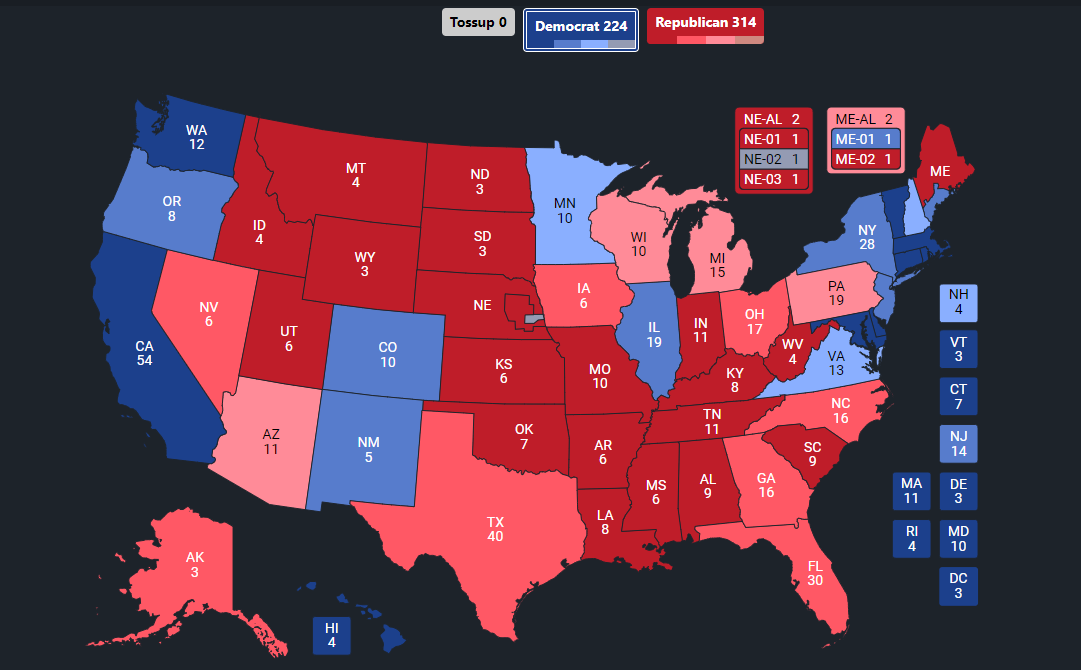

VA: D+3.8
NH: D+2.4
MN: D+2.2
CENTER: R+0
MI: R+1.1
NATIONAL: R+1.1
WI: R+1.8
PA: R+2.8
AZ: R+4.5
GA: R+5.0
NC: R+6.9